# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [31]:
import pandas as pd 

df = pd.read_csv('datasets/data.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['Bankrupt?']
x = df.drop(columns=['Bankrupt?'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score 

score = accuracy_score(y_test,predictions)
score

0.9501466275659824

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report

import matplotlib.pyplot as plt

c:\Users\lxx55\OneDrive\Desktop\MY-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\lxx55\OneDrive\Desktop\MY-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


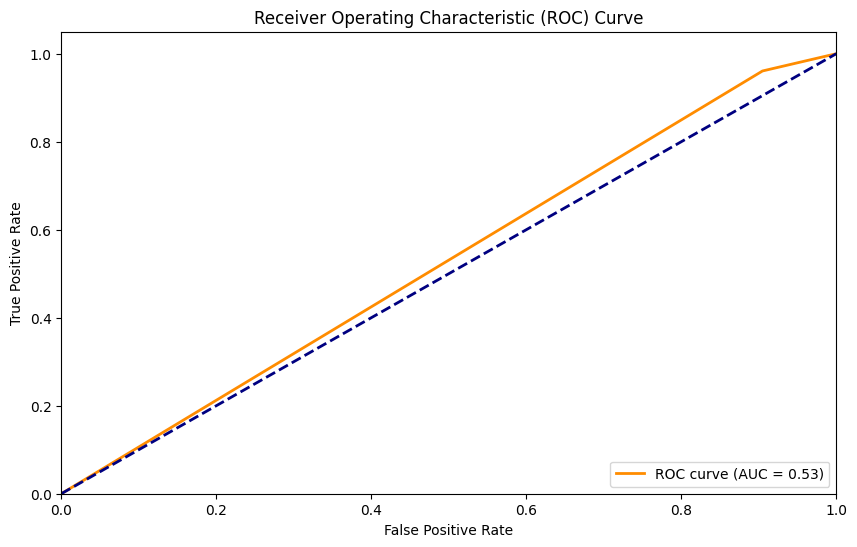

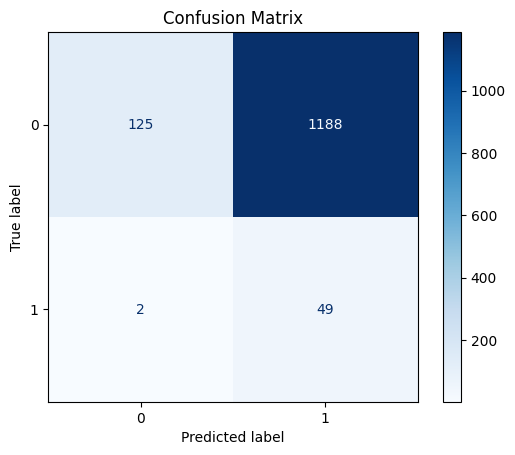

AUC Score: 0.528
F1 Score: 0.076

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.10      0.17      1313
           1       0.04      0.96      0.08        51

    accuracy                           0.13      1364
   macro avg       0.51      0.53      0.12      1364
weighted avg       0.95      0.13      0.17      1364



In [26]:
y_pred = model.predict(x_test_scaled)

y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(y_test, y_pred)

print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [27]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree

DecisionTreeClassifier: accuracy = 0.964


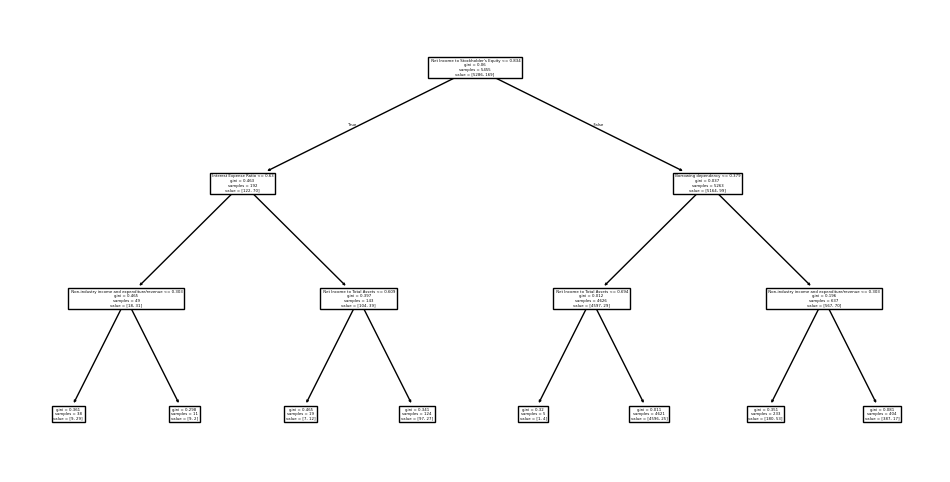

In [28]:
depth=3
sk_model = DecisionTreeClassifier(max_depth=depth, 
                                  random_state=1)
sk_model.fit(x_train, y_train)
sk_pred = sk_model.predict(x_test)
acc = (y_test == sk_pred).mean()
print('DecisionTreeClassifier: accuracy = {:.3f}'.format(acc))

feature_names = x.columns.tolist()
plt.figure(figsize=(12, 6))
tree.plot_tree(sk_model,
               feature_names=feature_names)
plt.show()

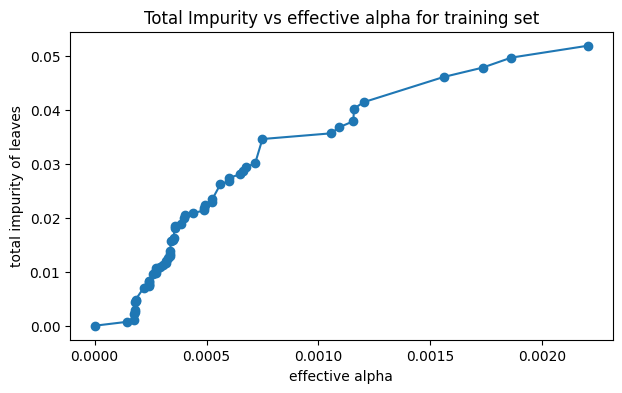

0) alpha = 0.0000 done.
1) alpha = 0.0001 done.
2) alpha = 0.0002 done.
3) alpha = 0.0002 done.
4) alpha = 0.0002 done.
5) alpha = 0.0002 done.
6) alpha = 0.0002 done.
7) alpha = 0.0002 done.
8) alpha = 0.0002 done.
9) alpha = 0.0002 done.
10) alpha = 0.0002 done.
11) alpha = 0.0002 done.
12) alpha = 0.0002 done.
13) alpha = 0.0002 done.
14) alpha = 0.0002 done.
15) alpha = 0.0003 done.
16) alpha = 0.0003 done.
17) alpha = 0.0003 done.
18) alpha = 0.0003 done.
19) alpha = 0.0003 done.
20) alpha = 0.0003 done.
21) alpha = 0.0003 done.
22) alpha = 0.0003 done.
23) alpha = 0.0003 done.
24) alpha = 0.0003 done.
25) alpha = 0.0003 done.
26) alpha = 0.0003 done.
27) alpha = 0.0003 done.
28) alpha = 0.0003 done.
29) alpha = 0.0003 done.
30) alpha = 0.0004 done.
31) alpha = 0.0004 done.
32) alpha = 0.0004 done.
33) alpha = 0.0004 done.
34) alpha = 0.0004 done.
35) alpha = 0.0004 done.
36) alpha = 0.0004 done.
37) alpha = 0.0005 done.
38) alpha = 0.0005 done.
39) alpha = 0.0005 done.
40) alpha 

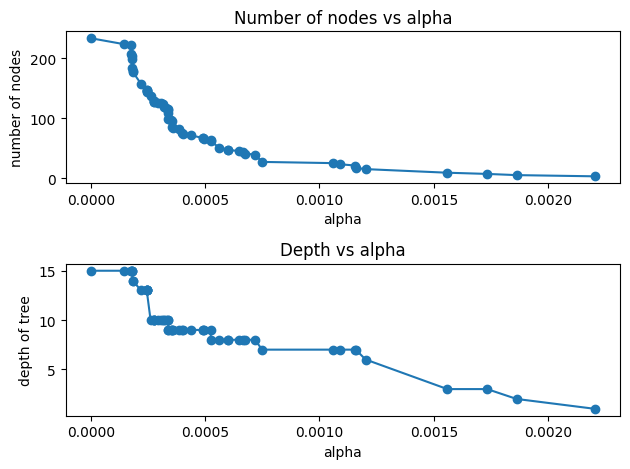

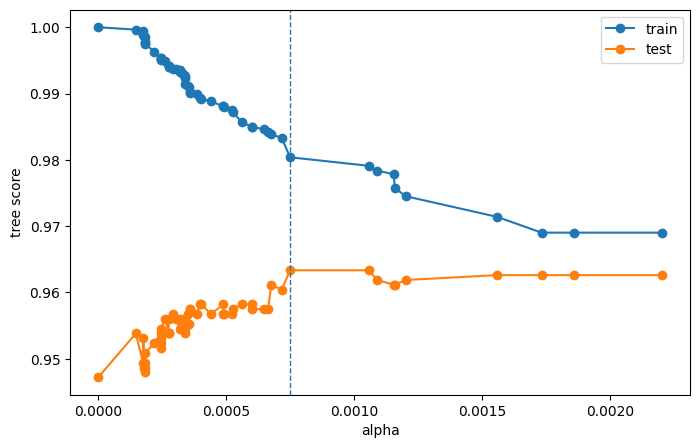

Accuracy of test data = 0.9633
Optimal alpha = 0.00074966


In [29]:
#Cost Complexity Pruning (CCP) and get the alpha-star list.
model = DecisionTreeClassifier()
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha = path.ccp_alphas[:-1]  # exclude the last one.
impurity = path.impurities[:-1]

# Observe impurity changes for alpha changes.
# As alpha increases, the penalty for |T| increases, resulting in
# simple trees and increased impurity (misclassification error).
plt.figure(figsize=(7,4))
plt.plot(ccp_alpha, impurity, marker='o')
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

# C(T) = R(T) + α|T|
# Create trees for each alpha in the alpha-list.
models = []
for i, alpha in enumerate(ccp_alpha):
    model = DecisionTreeClassifier(ccp_alpha=alpha)
    model.fit(x_train, y_train)
    models.append(model)
    print('%d) alpha = %.4f done.' % (i, alpha))

# You can see that as alpha increases, 
# the number and depth of nodes decrease.
node_counts = [model.tree_.node_count for model in models]
depth = [model.tree_.max_depth for model in models]

fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alpha, node_counts, marker="o")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alpha, depth, marker="o")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# Among the candidate trees, find the one with the lowest 
# misclassification rate on the test data. It's the same to find 
# the tree with the highest score.
# Calculate the score of the tree (model) with alpha applied.
train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]

# Find the alpha that creates the tree with the highest score on 
# the test data. This is the optimal alpha, and the tree is optimal.
i_max = np.argmax(test_score)
opt_alpha = ccp_alpha[i_max]
opt_model = models[i_max]

# Observe the change in score for the change in alpha.
plt.figure(figsize=(8,5))
plt.plot(ccp_alpha, train_score, marker='o', label='train')
plt.plot(ccp_alpha, test_score, marker='o', label='test')
plt.axvline(x=opt_alpha, ls='--', lw=1.0)
plt.legend()
plt.xlabel('alpha')
plt.ylabel('tree score')
plt.show()

# Evaluate the performance of the final tree.
print('Accuracy of test data = %.4f' % opt_model.score(x_test, y_test))
print('Optimal alpha = %.8f' % opt_alpha)


Accuracy of Model = 0.964


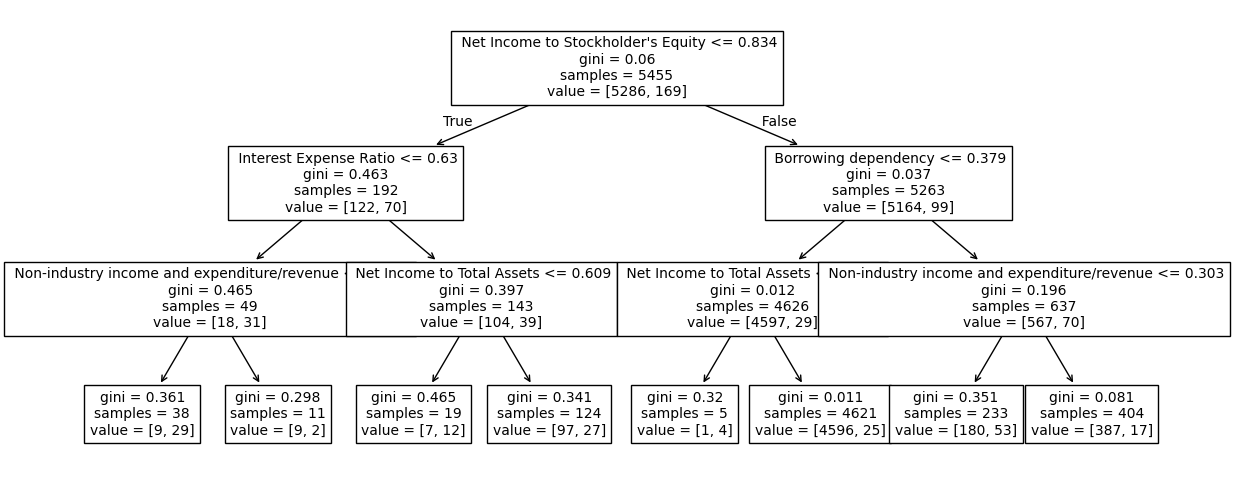

In [30]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

# Estimate the class of validation date.
y_pred = model.predict(x_test)

# Measure the accuracy for validation data
accuracy = (y_test == y_pred).mean()
print('Accuracy of Model = {:.3f}'.format(accuracy))

# Visualize the tree
# plt.figure(figsize=(20,10))
feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()